# 1) Data Understanding

# importing data

In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report , accuracy_score
from sklearn.svm import SVC

C:\Users\dell\AppData\Local\Temp/ipykernel_9576/2192214622.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [10]:
df1 = pd.read_csv("heart.csv")
df2 = pd.read_csv("o2Saturation.csv",names=["o2Saturation"])

In [11]:
df1 = df1.merge(df2,left_index = True,right_index=True)
df1.head(7)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   
5   57    1   0     140   192    0        1       148     0      0.4    1   
6   56    0   1     140   294    0        0       153     0      1.3    1   

   caa  thall  output  o2Saturation  
0    0      1       1          98.6  
1    0      2       1          98.6  
2    0      2       1          98.6  
3    0      2       1          98.6  
4    0      2       1          98.1  
5    0      1       1          97.5  
6    0      2       1          97.5

In [53]:
dict = {}

for i in list(df1.columns):
    dict[i] = df1[i].value_counts().shape[0]
    
pd.DataFrame(dict,index=["Unique count"]).transpose()

Unique count
sex                             2
age                            41
chest_pain                      4
blood_pressure                 49
cholestoral                   152
fasting_blood_sugar             2
restecg                         3
max_heart_rate                 91
angina                          2
oldpeak                        40
slp                             3
n_vessels                       5
thall                           4
o2Saturation                    7
heart_attack                    2

# Data information and its summary

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   trtbps        303 non-null    int64  
 4   chol          303 non-null    int64  
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalachh      303 non-null    int64  
 8   exng          303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slp           303 non-null    int64  
 11  caa           303 non-null    int64  
 12  thall         303 non-null    int64  
 13  output        303 non-null    int64  
 14  o2Saturation  303 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 37.9 KB


# 2) Data preparation

In [13]:
df1.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'o2Saturation'],
      dtype='object')

In [19]:
df1.rename(columns={"cp": "chest_pain",
                   "trtbps":"blood_pressure",
                   "chol":"cholestoral",
                   "fbs":"fasting_blood_sugar",
                   "thalachh":"max_heart_rate",
                   "exng":"angina",
                   "caa": "n_vessels",
                   "output":"heart_attack"},
          inplace=True)

df1["sex"].replace({0:"Female",1:"Male"},inplace=True)


li = df1.columns.tolist() #to change the dataframe columns to list
li[0],li[1],li[-2],li[-1] = li[1],li[0],li[-1],li[-2]
df1 = df1[li]

df1.head()

sex  age  chest_pain  blood_pressure  cholestoral  fasting_blood_sugar  \
0    Male   63           3             145          233                    1   
1    Male   37           2             130          250                    0   
2  Female   41           1             130          204                    0   
3    Male   56           1             120          236                    0   
4  Female   57           0             120          354                    0   

   restecg  max_heart_rate  angina  oldpeak  slp  n_vessels  thall  \
0        0             150       0      2.3    0          0      1   
1        1             187       0      3.5    0          0      2   
2        0             172       0      1.4    2          0      2   
3        1             178       0      0.8    2          0      2   
4        1             163       1      0.6    2          0      2   

   o2Saturation  heart_attack  
0          98.6             1  
1          98.6             1  
2          98.6             1  
3          98.6             1  
4          98.1             1

In [20]:
df1.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Summary statistics

In [22]:
con_cols = ['age','blood_pressure','cholestoral','max_heart_rate','o2Saturation']

df1[con_cols].describe().T

count        mean        std    min    25%    50%    75%  \
age             303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   
blood_pressure  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0   
cholestoral     303.0  246.264026  51.830751  126.0  211.0  240.0  274.5   
max_heart_rate  303.0  149.646865  22.905161   71.0  133.5  153.0  166.0   
o2Saturation    303.0   97.484488   0.352649   96.5   97.5   97.5   97.5   

                  max  
age              77.0  
blood_pressure  200.0  
cholestoral     564.0  
max_heart_rate  202.0  
o2Saturation     98.6

# EDA

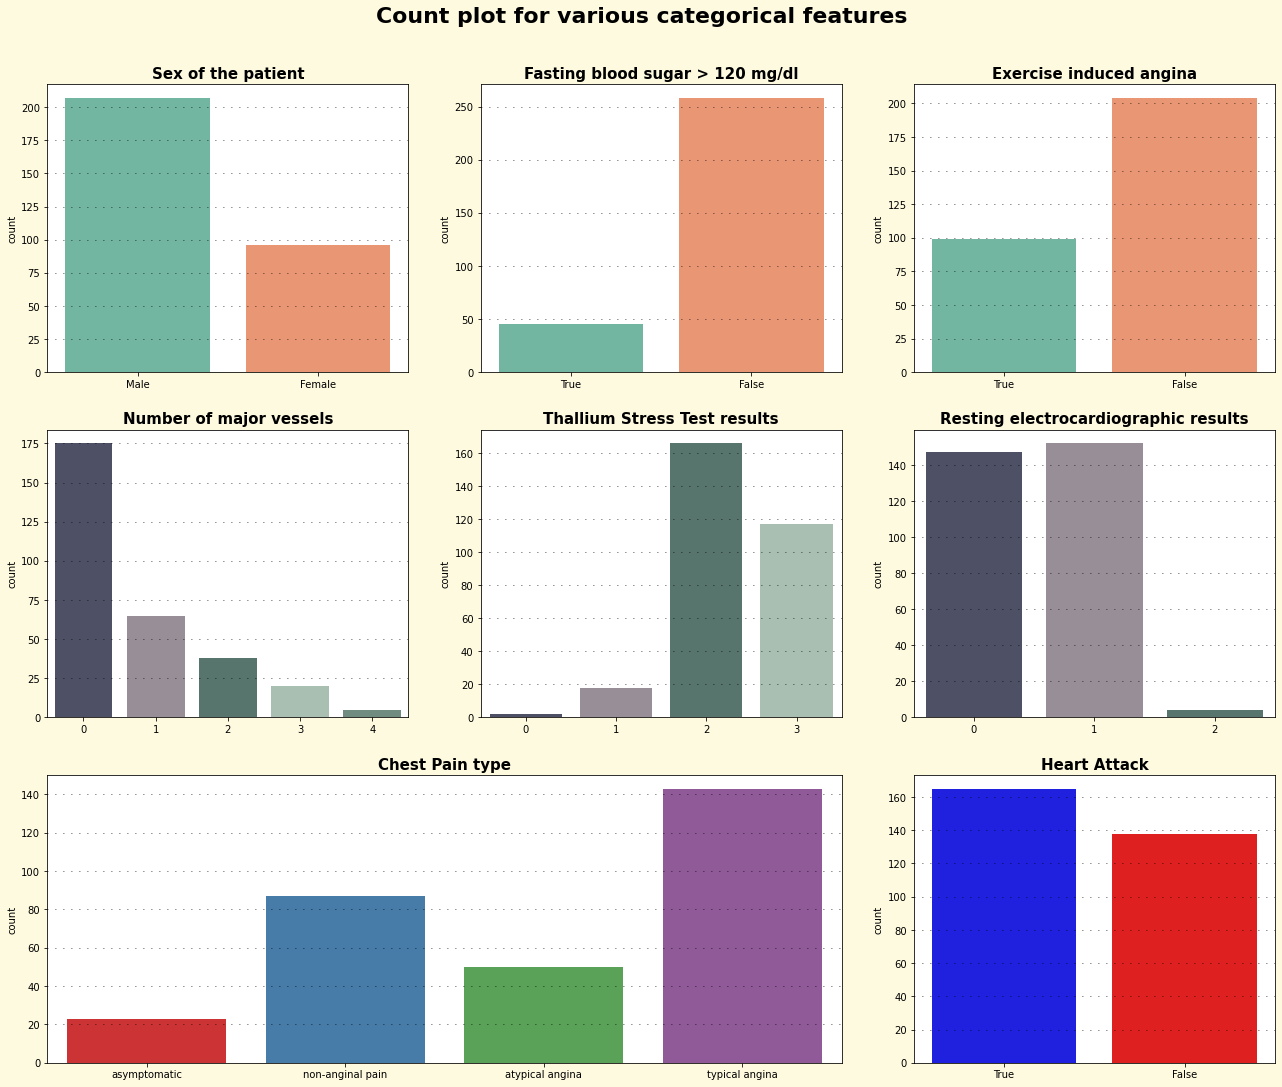

In [28]:
fig = plt.figure(figsize=(22,18))
gs  = fig.add_gridspec(3,3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[2,:-1])
ax8 = fig.add_subplot(gs[2,2])


fig.suptitle(t='Count plot for various categorical features',y=0.94, fontweight ="bold",fontsize=22)
fig.set_facecolor("#fefae0")
color_platte = ['#4a4e69','#9a8c98','#52796f','#a4c3b2','#6b9080']

#filling for sex column
ax1.set_title("Sex of the patient",fontweight="bold",fontsize=15)
ax1.grid(color="#000000",linestyle = "dashed",axis="y",dashes=(1,9))
sns.countplot(ax=ax1,data=df1,x='sex',palette="Set2")
ax1.set_xlabel("") 

# filling for fasting blood sugar 
ax2.set_title('Fasting blood sugar > 120 mg/dl',fontweight ="bold",fontsize=15)
ax2.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax2,data=df1,x='fasting_blood_sugar',order=[True,False],palette = 'Set2')
ax2.set_xlabel("")

# filling for angina 
ax3.set_title('Exercise induced angina',fontweight ="bold",fontsize=15)
ax3.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax3,data=df1,x='angina',order=[True, False],palette = 'Set2')
ax3.set_xlabel("")

# filling for numbers of vessels 
ax4.set_title('Number of major vessels',fontweight ="bold",fontsize=15)
ax4.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax4,data=df1,x='n_vessels',palette = color_platte)
ax4.set_xlabel("")

# filling for thall 
ax5.set_title('Thallium Stress Test results',fontweight ="bold",fontsize=15)
ax5.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax5,data=df1,x='thall',palette = color_platte)
ax5.set_xlabel("")

# filling for restecg 
ax6.set_title('Resting electrocardiographic results',fontweight ="bold",fontsize=15)
ax6.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax6,data=df1,x='restecg',palette = color_platte)
ax6.set_xlabel("")

# filling for chest pain
leges = {0: 'typical angina',1: 'atypical angina',2: 'non-anginal pain',3: 'asymptomatic'}
ax7.set_title('Chest Pain type',fontweight ="bold",fontsize=15)
ax7.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax7,data=df1.assign(chest_pain = df1['chest_pain'].replace(leges)),x='chest_pain',palette = 'Set1')
ax7.set_xlabel("")

# filling for Heart Attack 
ax8.set_title('Heart Attack',fontweight ="bold",fontsize=15)
ax8.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax8,data=df1,x='heart_attack',order=[True, False],palette = ['blue','red'])
ax8.set_xlabel("")
plt.show()

# Distribution of continuous features according to target variable

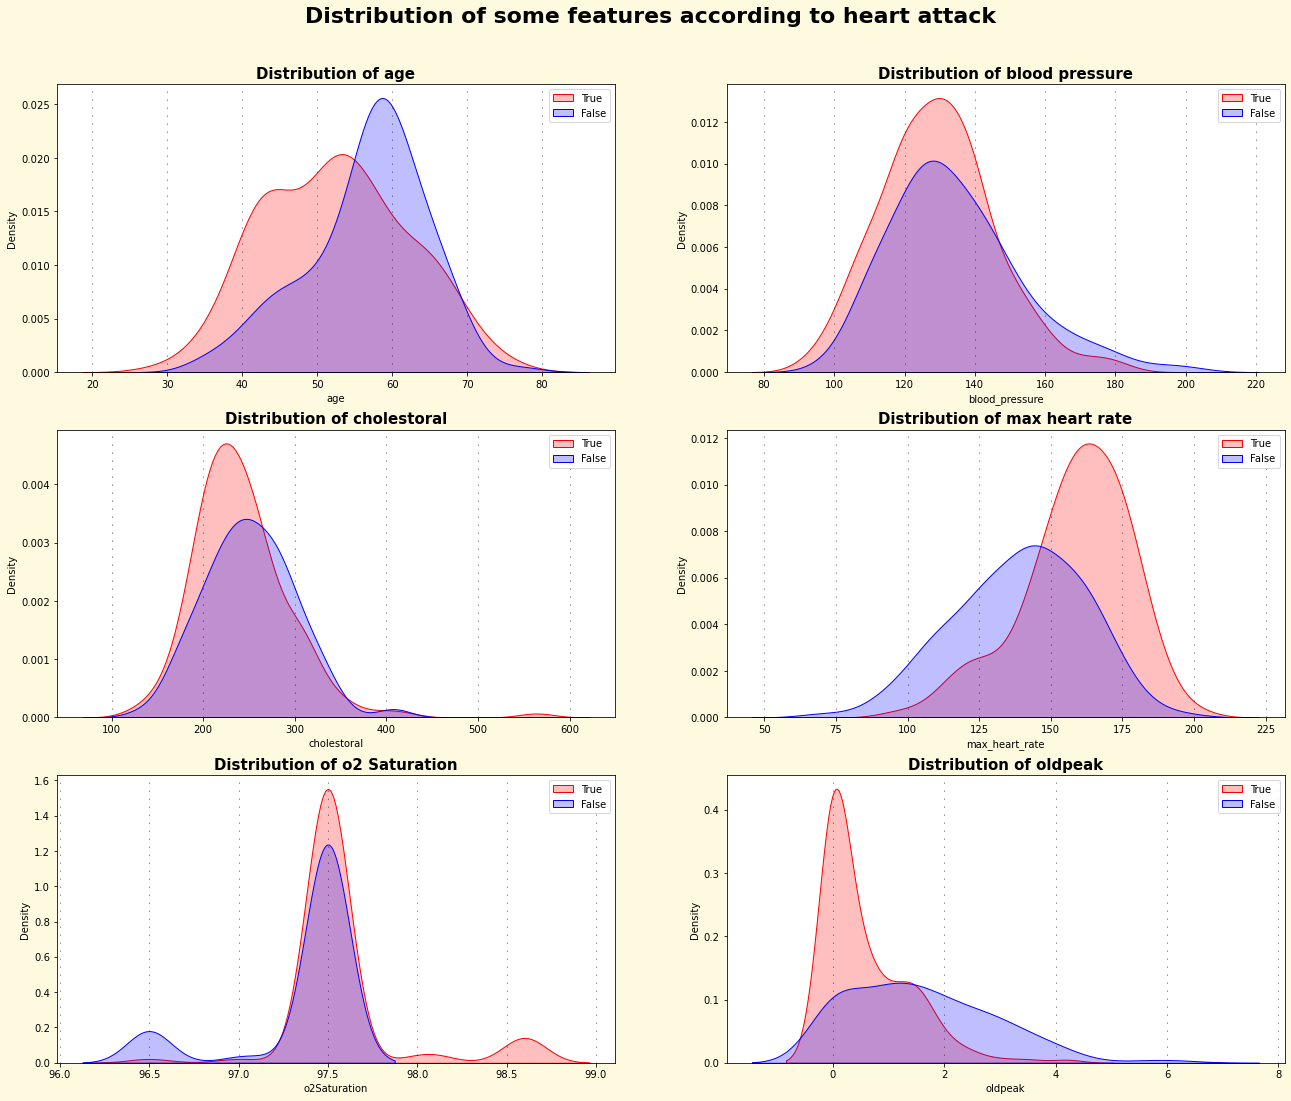

In [30]:
fig = plt.figure(figsize=(22,18))
gs = fig.add_gridspec(3,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])

fig.suptitle(t='Distribution of some features according to heart attack',y=0.94, fontweight ="bold",fontsize=22)
fig.set_facecolor("#fefae0")
color_platte = ['#4a4e69','#9a8c98','#52796f','#a4c3b2','#6b9080']

#age 
ax1.set_title("Distribution of age",fontweight="bold",fontsize=15)
ax1.grid(color="#000000",linestyle="dashed",axis="x",dashes=(1,9))
sns.kdeplot(ax=ax1,data=df1,x="age",hue="heart_attack",fill=True,palette=["blue","red"])
ax1.legend([True,False])

# blood_pressure 
ax2.set_title('Distribution of blood pressure',fontweight ="bold",fontsize=15)
ax2.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax2,data=df1,x='blood_pressure', hue='heart_attack', fill=True, palette = ['blue','red'])
ax2.legend([True, False])

# cholestoral 
ax3.set_title('Distribution of cholestoral',fontweight ="bold",fontsize=15)
ax3.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax3,data=df1,x='cholestoral', hue='heart_attack', fill=True, palette = ['blue','red'])
ax3.legend([True, False])

# blood_pressure 
ax4.set_title('Distribution of max heart rate',fontweight ="bold",fontsize=15)
ax4.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax4,data=df1,x='max_heart_rate', hue='heart_attack', fill=True, palette = ['blue','red'])
ax4.legend([True, False])

# o2Saturation 
ax5.set_title('Distribution of o2 Saturation',fontweight ="bold",fontsize=15)
ax5.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax5,data=df1,x='o2Saturation', hue='heart_attack', fill=True, palette = ['blue','red'])
ax5.legend([True, False])


# oldpeak 
ax6.set_title('Distribution of oldpeak',fontweight ="bold",fontsize=15)
ax6.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax6,data=df1,x='oldpeak', hue='heart_attack', fill=True, palette = ['blue','red'])
ax6.legend([True, False])

plt.show()

Boxen plot of continuous features

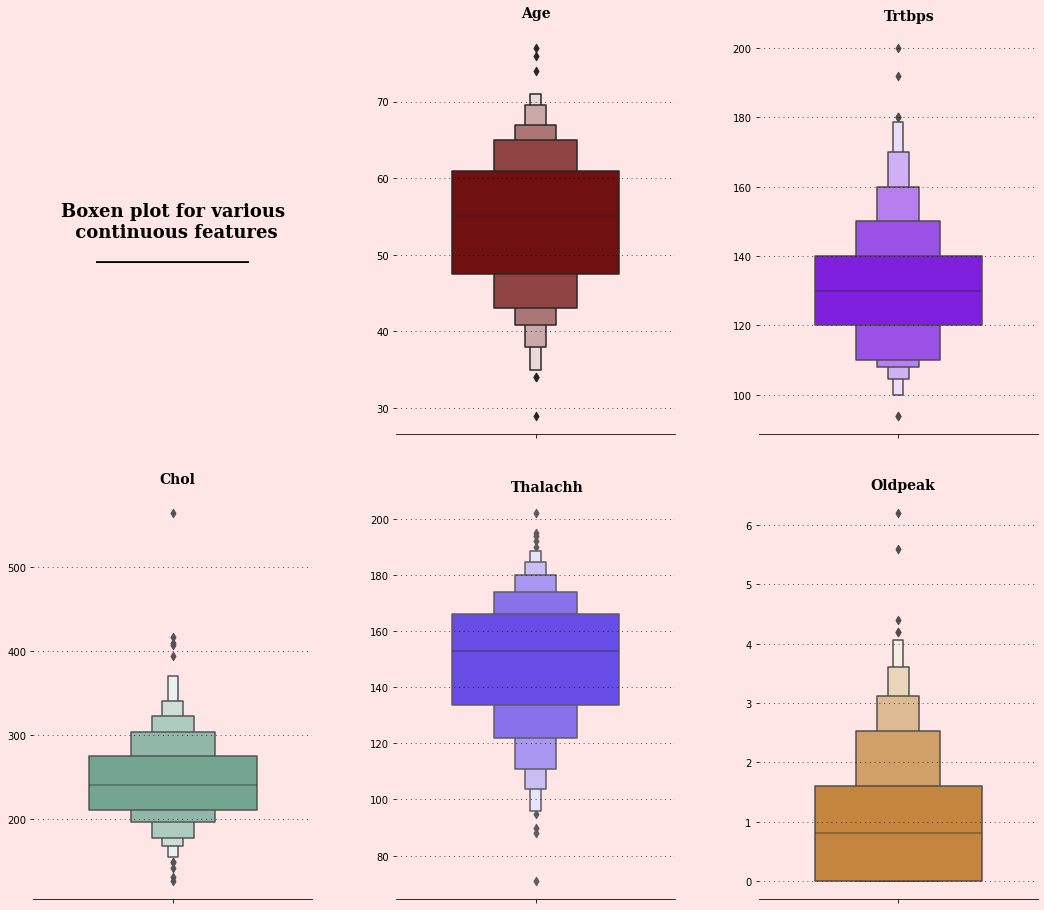

In [63]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])


background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df1['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")
# Trtbps 
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df1['blood_pressure'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol 
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df1['cholestoral'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh 
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df1['max_heart_rate'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak 
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df1['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

Count plot of target

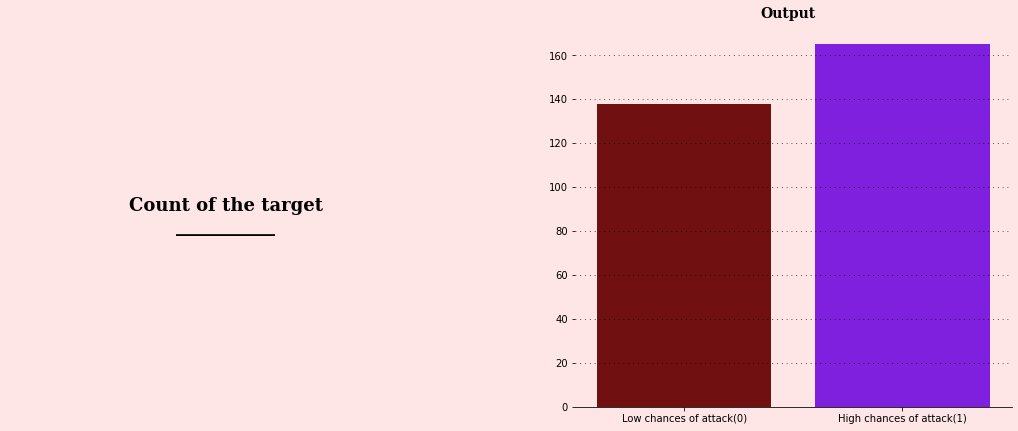

In [70]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df1, x = 'heart_attack',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

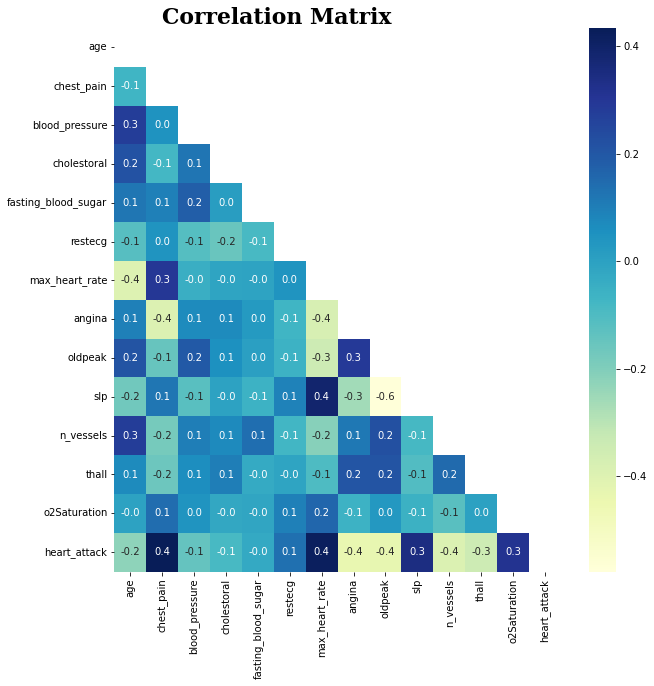

In [72]:
#make a correlation matrix
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3,hspace=0.15)
ax0 =fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df1.corr()))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = df1.corr()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

Scatterplot heatmap of dataframe

In [73]:
fig = plt.figure(figsize=(12,12))
corr_mat = df1.corr().stack().reset_index(name="correlation")

g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250),size_norm=(-.2,.8),
)

g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

<Figure size 864x864 with 0 Axes>

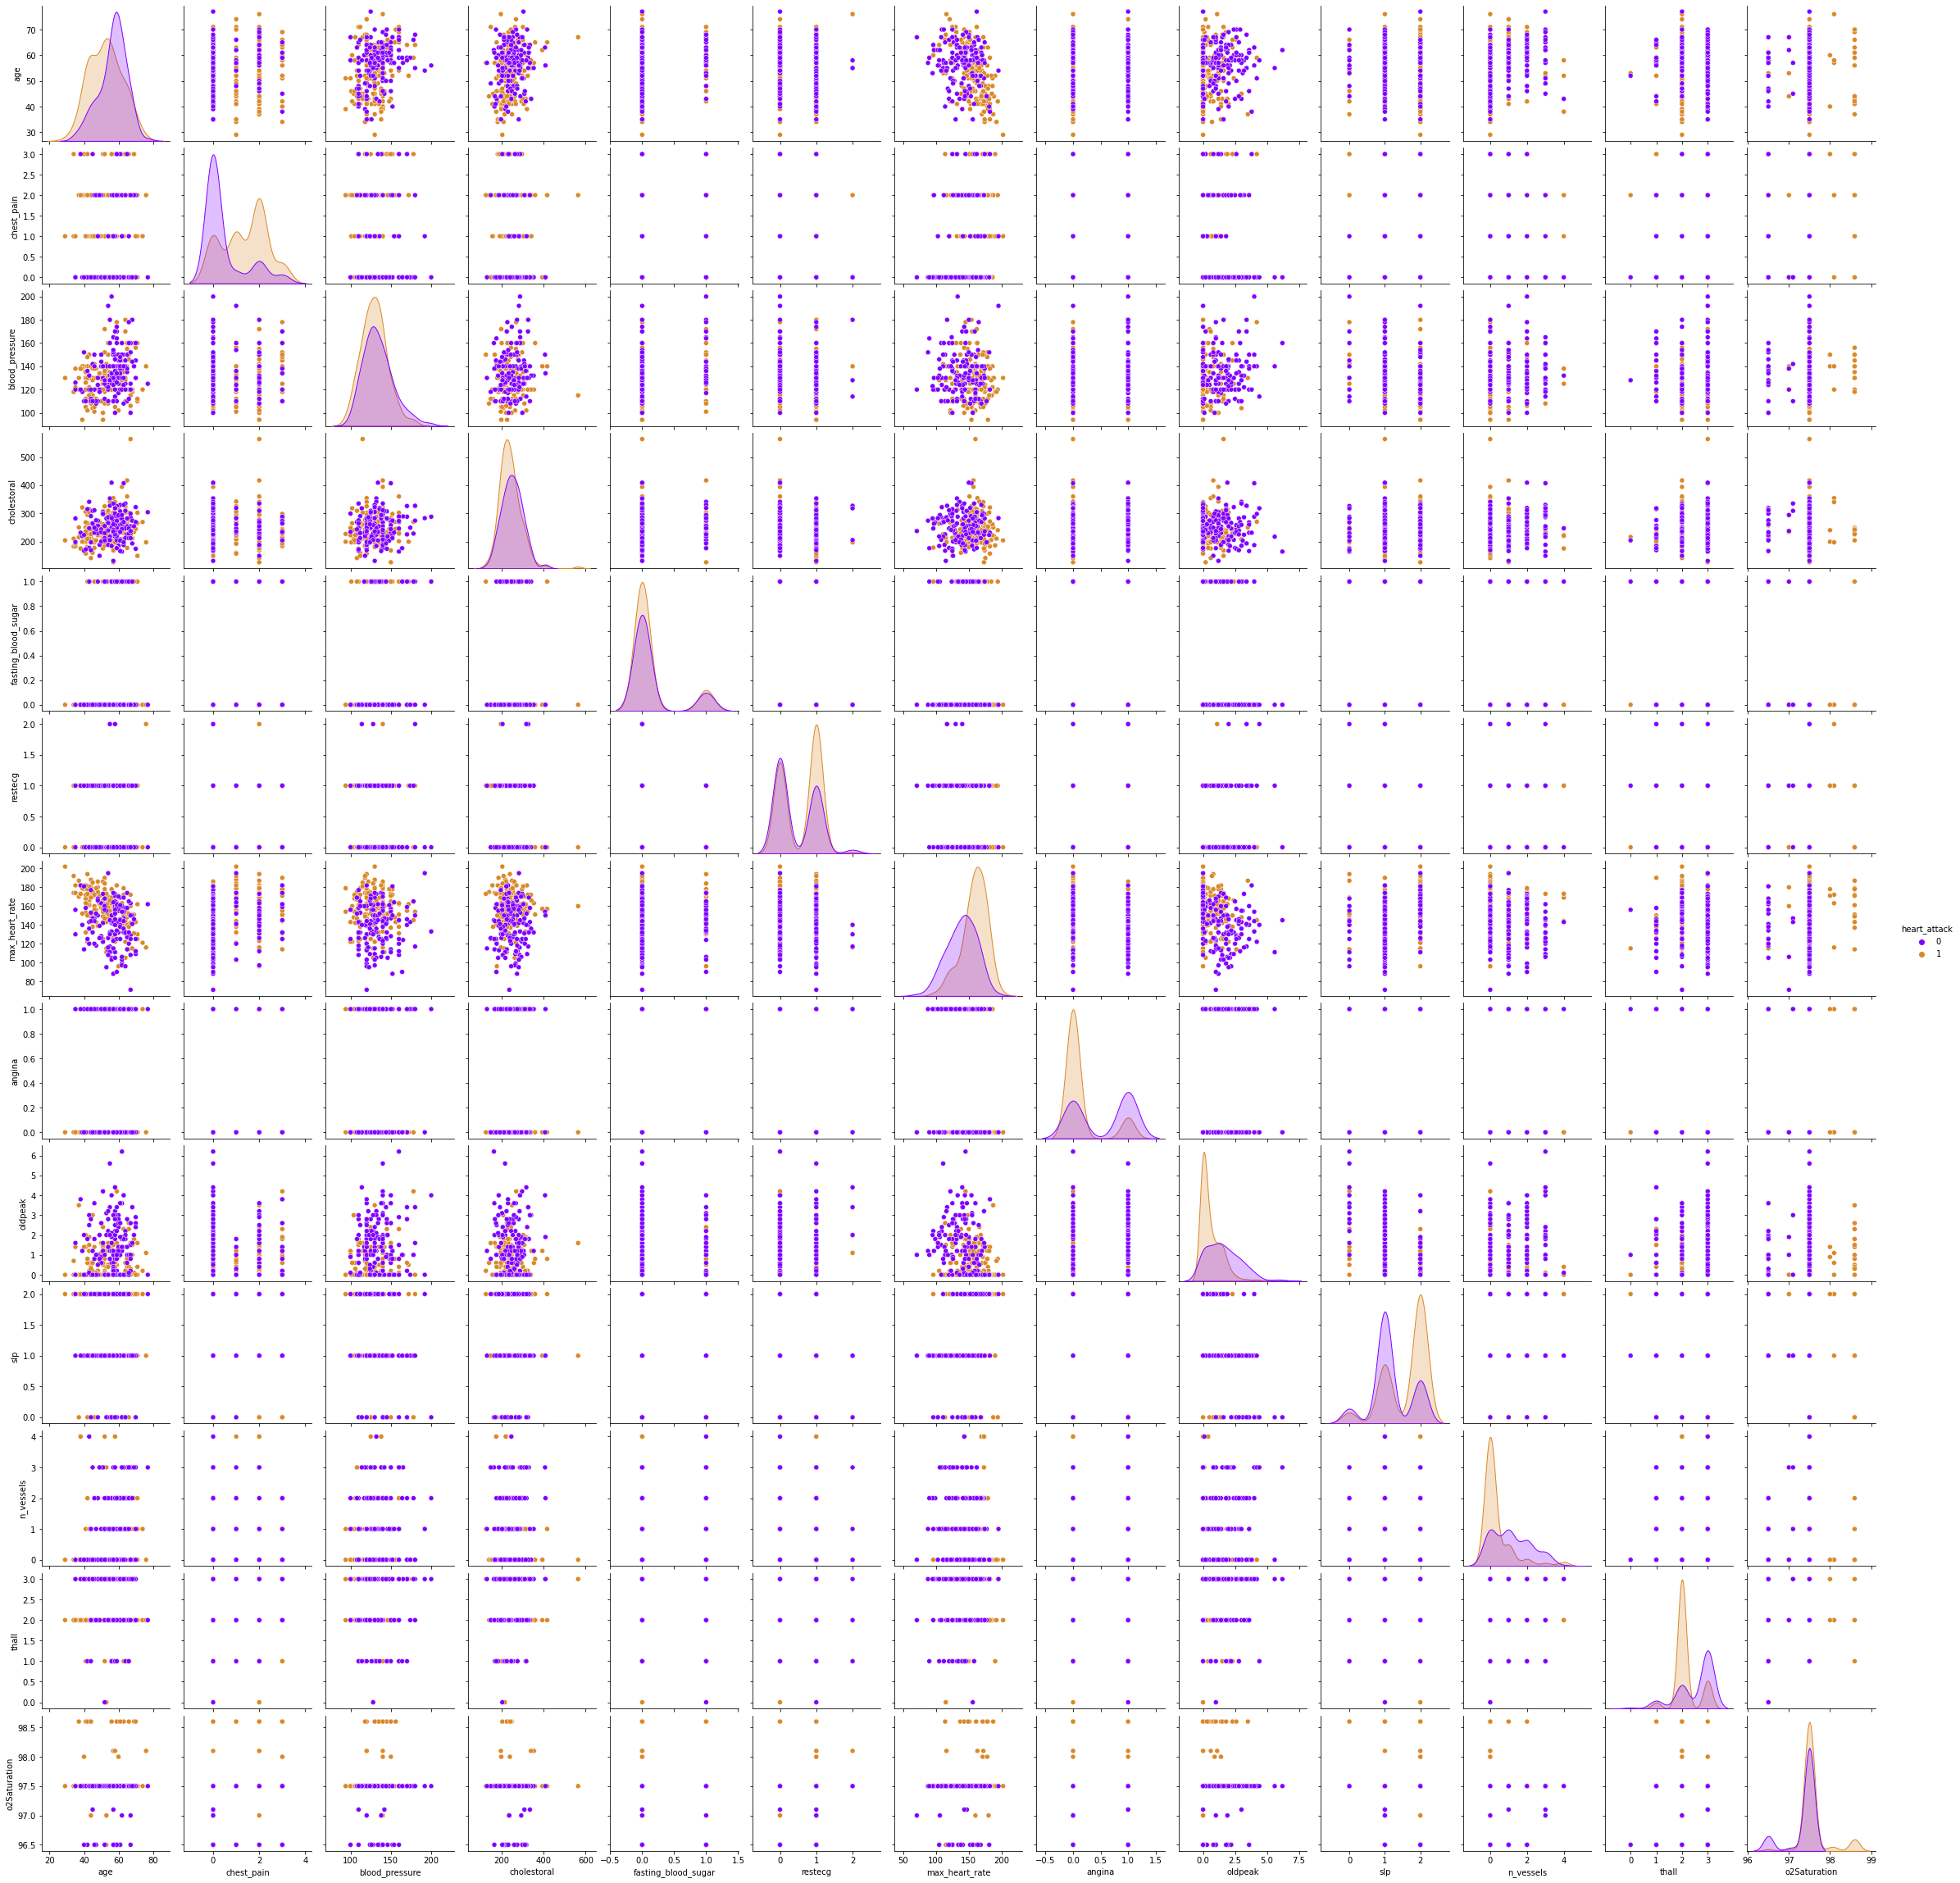

In [74]:
sns.pairplot(df1,hue="heart_attack",palette=["#8000ff","#da8829"])
plt.show()

Distribution of continuous features according to target variable

In [78]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df1, x='age',hue="heart_attack", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribution of trtbps\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df1, x='blood_pressure',hue="heart_attack", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df1, x='cholestoral',hue="heart_attack", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribution of thalachh\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df1, x='max_heart_rate',hue="heart_attack", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df1, x='oldpeak',hue="heart_attack", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

# Correlation between features and heart attack

In [31]:
df_corr = df1.assign(sex = df1["sex"].replace({"Female":0,"Male":1})).corr()

df_corr["heart_attack"]

sex                   -0.280937
age                   -0.225439
chest_pain             0.433798
blood_pressure        -0.144931
cholestoral           -0.085239
fasting_blood_sugar   -0.028046
restecg                0.137230
max_heart_rate         0.421741
angina                -0.436757
oldpeak               -0.430696
slp                    0.345877
n_vessels             -0.391724
thall                 -0.344029
o2Saturation           0.313584
heart_attack           1.000000
Name: heart_attack, dtype: float64

# 4) Modeling

Split data to 80% train data & 20% test data randomly (to build & evaluate Model)

In [35]:
x = df1.assign(sex=df1["sex"].replace({"Female":0,"Male":1})).drop("heart_attack",axis=1)
y = df1["heart_attack"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Preview of the first 7 rows of train data

In [37]:
x_train.merge(y_train,left_index=True,right_index=True).head(7)

sex  age  chest_pain  blood_pressure  cholestoral  fasting_blood_sugar  \
132    1   42           1             120          295                    0   
202    1   58           0             150          270                    0   
196    1   46           2             150          231                    0   
75     0   55           1             135          250                    0   
176    1   60           0             117          230                    1   
59     0   57           0             128          303                    0   
93     0   54           1             132          288                    1   

     restecg  max_heart_rate  angina  oldpeak  slp  n_vessels  thall  \
132        1             162       0      0.0    2          0      2   
202        0             111       1      0.8    2          0      3   
196        1             147       0      3.6    1          0      2   
75         0             161       0      1.4    1          0      2   
176        1             160       1      1.4    2          2      3   
59         0             159       0      0.0    2          1      2   
93         0             159       1      0.0    2          1      2   

     o2Saturation  heart_attack  
132          97.5             1  
202          97.5             0  
196          97.5             0  
75           97.5             1  
176          97.5             0  
59           97.5             1  
93           97.5             1

Preview of the first 7 rows of test data

In [38]:
x_test.merge(y_test,left_index=True,right_index=True).head(7)

sex  age  chest_pain  blood_pressure  cholestoral  fasting_blood_sugar  \
179    1   57           0             150          276                    0   
228    1   59           3             170          288                    0   
111    1   57           2             150          126                    1   
246    0   56           0             134          409                    0   
60     0   71           2             110          265                    1   
9      1   57           2             150          168                    0   
119    0   46           0             138          243                    0   

     restecg  max_heart_rate  angina  oldpeak  slp  n_vessels  thall  \
179        0             112       1      0.6    1          1      1   
228        0             159       0      0.2    1          0      3   
111        1             173       0      0.2    2          1      3   
246        0             150       1      1.9    1          2      3   
60         0             130       0      0.0    2          1      2   
9          1             174       0      1.6    2          0      2   
119        0             152       1      0.0    1          0      2   

     o2Saturation  heart_attack  
179          97.5             0  
228          97.5             0  
111          97.5             1  
246          97.5             0  
60           97.5             1  
9            97.5             1  
119          97.5             1

Build Model (Support Vector Machines)

In [41]:
params_grid = {
    "random_state" : [0],
    "C" : [0.1,0.5,1],
    "kernel" : ["linear","rbf","sigmoid"]
}

svc = GridSearchCV(estimator=SVC(),param_grid=params_grid,cv=5)

model = make_pipeline(StandardScaler(),svc)

model.fit(x_train,y_train)
y_pred = model.predict(x_test)
svc.best_estimator_

SVC(C=1, random_state=0)

In [42]:
#display best parameter
svc.best_params_

{'C': 1, 'kernel': 'rbf', 'random_state': 0}

In [43]:
#display best score
svc.best_score_

0.8551870748299321

In [44]:
#display best index
svc.best_index_

7

# 5) Validation

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        29
           1       1.00      0.88      0.93        32

    accuracy                           0.93        61
   macro avg       0.94      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



Evaluated Score Train DataSet by Model

In [47]:
print("Score train dataset :" , model.score(x_train,y_train))

Score train dataset : 0.9421487603305785


Evaluated Score Test DataSet by Model

In [48]:
print("Score Test dataset :" , model.score(x_test,y_test))

Score Test dataset : 0.9344262295081968


Accuracy Score

In [50]:
print( 'Accuracy score of SVM is', accuracy_score(y_test, y_pred))

Accuracy score of SVM is 0.9344262295081968
